In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [14]:
# Load the dataset
df = pd.read_csv('/Users/hitteshkumarm/Desktop/COLLEGE/FeyNN Labs/RS_Session_257_AS_71_B.csv')

In [15]:
# Remove the "Total" row if present
df = df[df['State/UT'] != 'Total']

# Check for missing values
print(df.isnull().sum())

Sl. No.          0
State/UT         0
e2W              0
e3W              3
e4W             14
Electric Bus    26
dtype: int64


In [16]:
df.replace('NA', np.nan, inplace=True)


# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to fill missing values with the mean
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

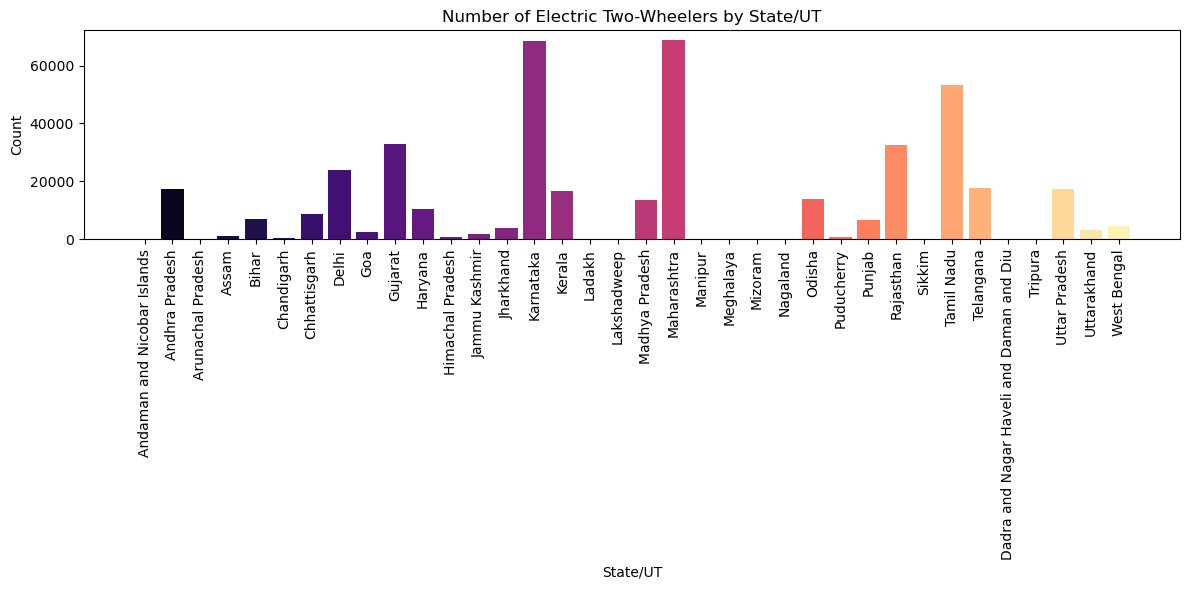

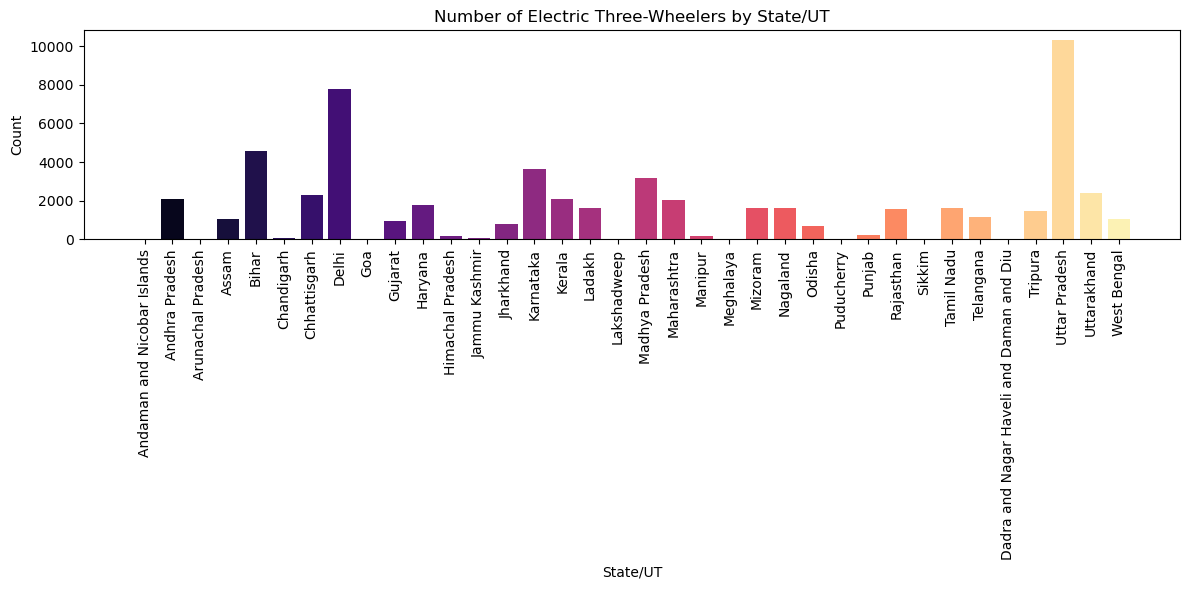

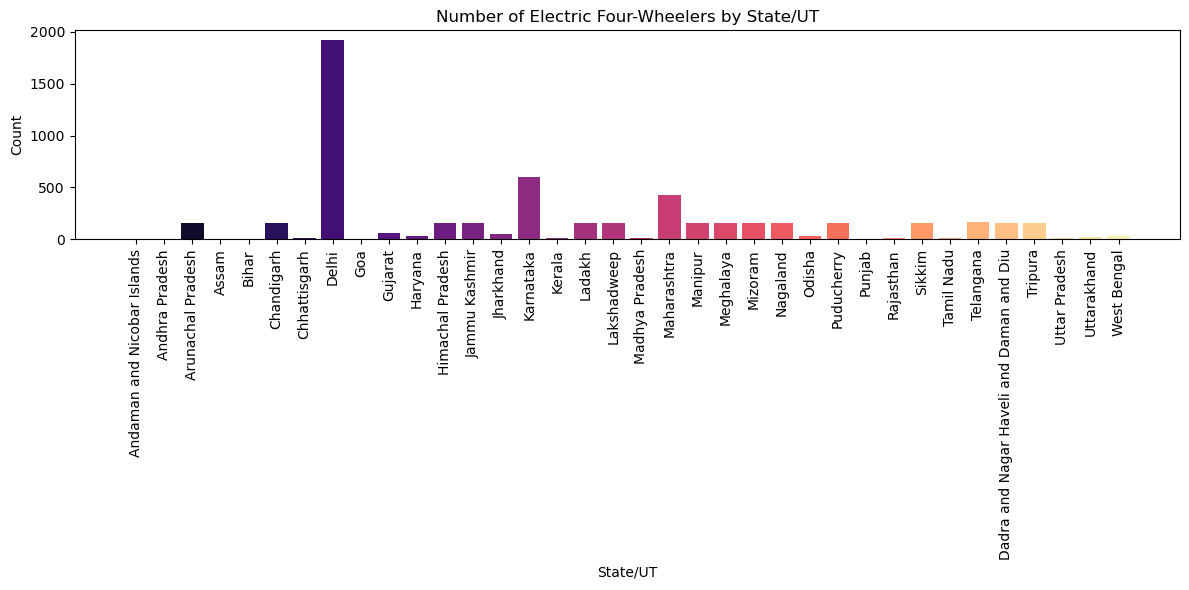

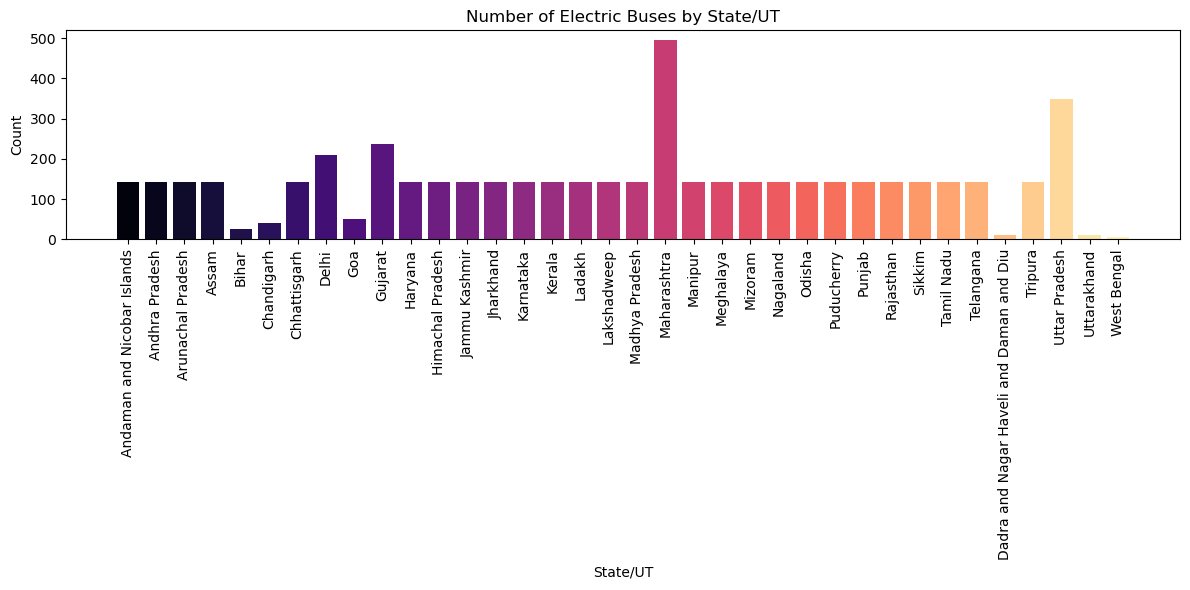

In [17]:
colors = sns.color_palette("magma", len(df))
# Bar chart for the number of electric two-wheelers (e2W) by State/UT
plt.figure(figsize=(12, 6))
plt.bar(df['State/UT'], df['e2W'], color=colors)
plt.xticks(rotation=90)
plt.title('Number of Electric Two-Wheelers by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Bar chart for the number of electric three-wheelers (e3W) by State/UT
plt.figure(figsize=(12, 6))
plt.bar(df['State/UT'], df['e3W'], color=colors)
plt.xticks(rotation=90)
plt.title('Number of Electric Three-Wheelers by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Bar chart for the number of electric four-wheelers (e4W) by State/UT
plt.figure(figsize=(12, 6))
plt.bar(df['State/UT'], df['e4W'], color=colors)
plt.xticks(rotation=90)
plt.title('Number of Electric Four-Wheelers by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Bar chart for the number of electric buses (Electric Bus) by State/UT
plt.figure(figsize=(12, 6))
plt.bar(df['State/UT'], df['Electric Bus'], color=colors)
plt.xticks(rotation=90)
plt.title('Number of Electric Buses by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [18]:
# Select relevant columns for clustering
X = df[['e2W', 'e3W', 'e4W', 'Electric Bus']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters (k) based on your specific analysis

# Apply K-Means clustering
k = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=k, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

/Users/hitteshkumarm/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


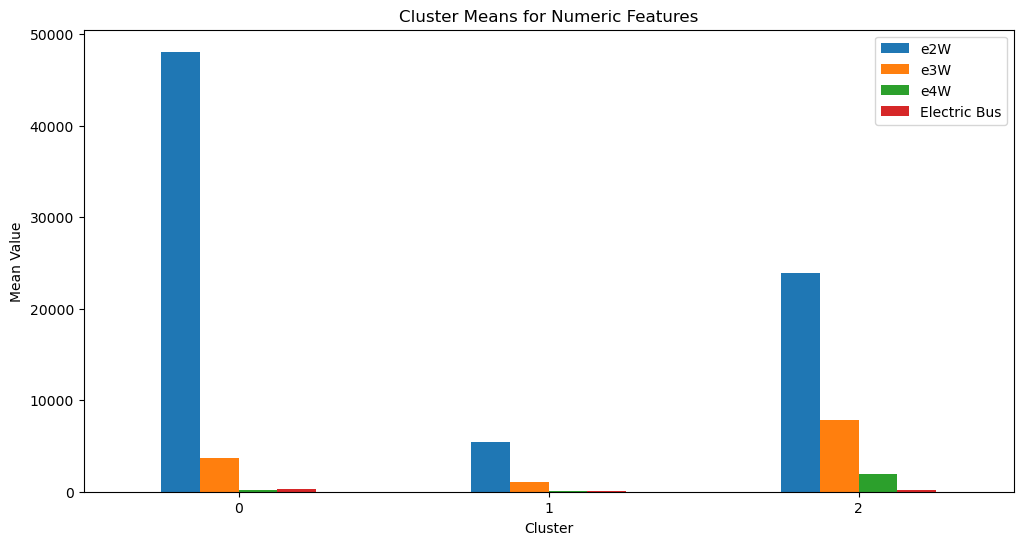

In [19]:
cluster_means = df.groupby('Cluster')[numeric_columns].mean()

# Visualize the cluster means
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Means for Numeric Features')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.show()

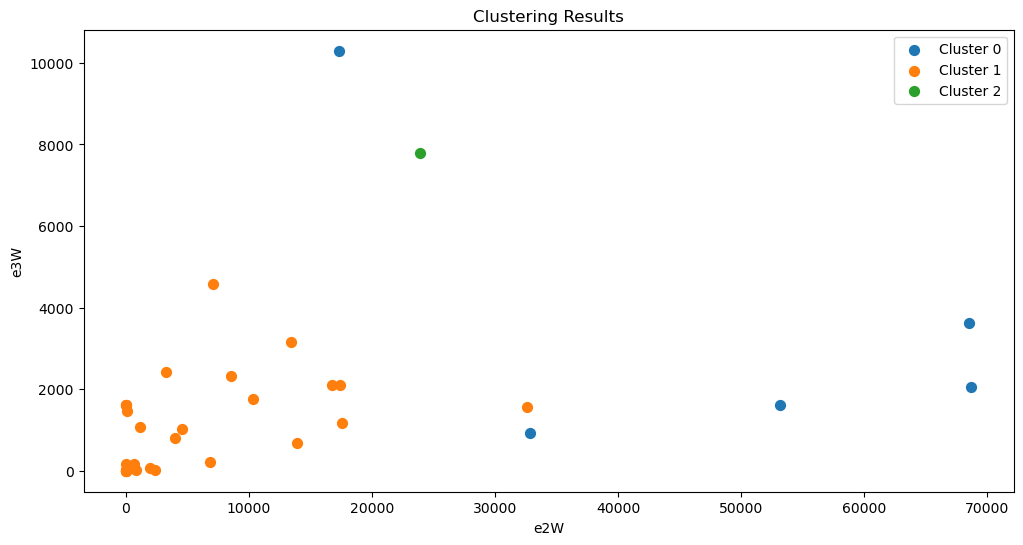

In [20]:
# Create a scatter plot to visualize the clustering results
plt.figure(figsize=(12, 6))

# Example for e2W and e3W, you can modify the features accordingly
plt.scatter(df[df['Cluster'] == 0]['e2W'], df[df['Cluster'] == 0]['e3W'], label='Cluster 0', s=50)
plt.scatter(df[df['Cluster'] == 1]['e2W'], df[df['Cluster'] == 1]['e3W'], label='Cluster 1', s=50)
plt.scatter(df[df['Cluster'] == 2]['e2W'], df[df['Cluster'] == 2]['e3W'], label='Cluster 2', s=50)

plt.title('Clustering Results')
plt.xlabel('e2W')
plt.ylabel('e3W')
plt.legend()
plt.show()
